# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

## Checking the shape of the dataset

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Checking the data for null values

In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Data Preprocessing

In [8]:
df['Age'] = 2023 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Renaming the columns for better understanding

In [10]:
df.rename(columns= {'Selling_Price': 'Selling_Price(lacs)', 'Present_Price': 'Present_Price(lacs)', 'Owner': 'Past_Owners'}, inplace=True)

In [11]:
df.head()

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


## Checking all the columns

In [12]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

# Visualizing the data

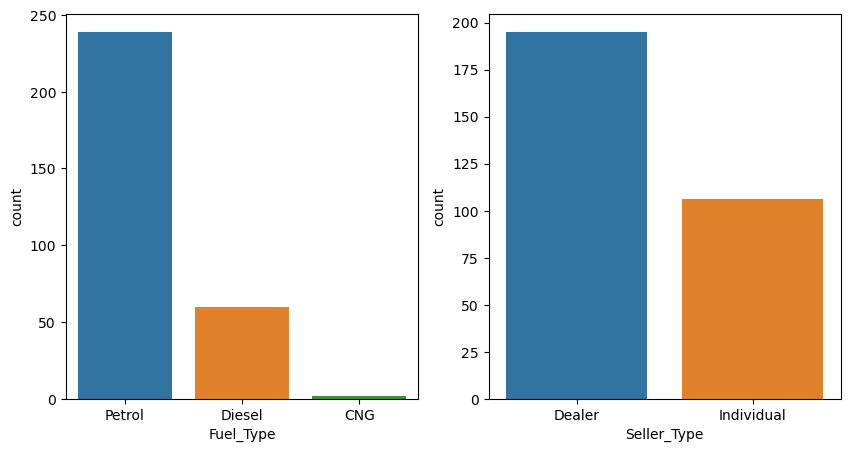

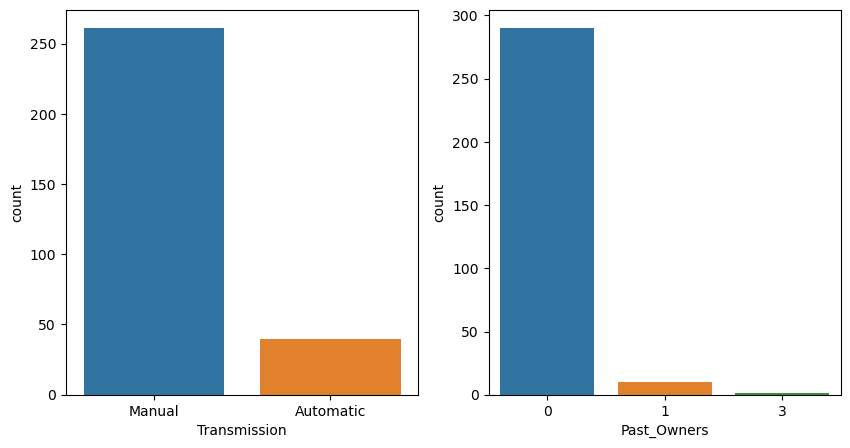

In [13]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
    fig = plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1

    plt.show()

In [14]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [15]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,8
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [22]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,18
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,13
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,15


In [26]:
data = df[['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Past_Owners', 'Age']].copy()

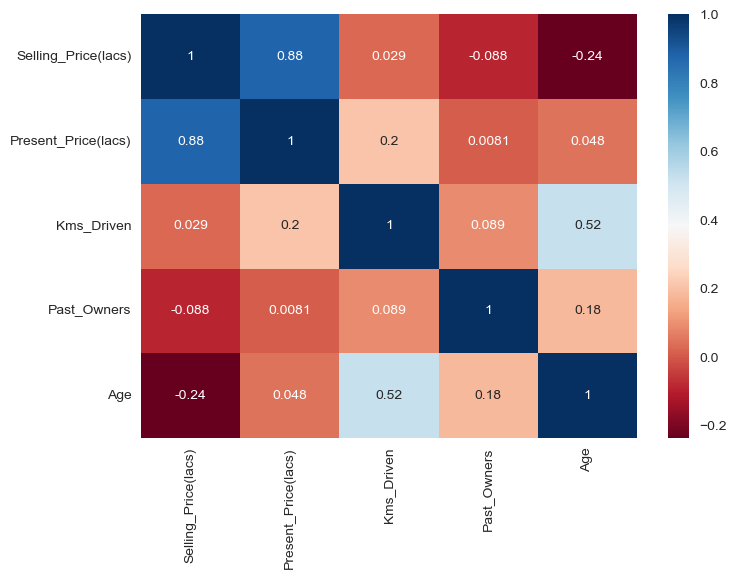

In [31]:
sns.heatmap(data.corr(), annot=True, cmap='RdBu')
plt.show()

In [33]:
data.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [35]:
df.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


## Create dummies for categorical values

In [36]:
df.drop(labels='Car_Name', axis=1, inplace=True)

In [37]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [38]:
df = pd.get_dummies(df, drop_first=True)

In [39]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


# Train Test Split

In [40]:
X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

In [41]:
print(X.shape, y.shape)

(301, 8) (301, 1)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

## Scaling the data for better training

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(301, 8) (240, 8) (61, 8)


## Building ANN

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [63]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 48.7232 - val_loss: 38.3951
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 42.7475 - val_loss: 33.6373
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 37.9547 - val_loss: 29.4069
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 33.7545 - val_loss: 25.5888
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 29.8666 - val_loss: 21.9583
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 26.0882 - val_loss: 18.3547
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 22.4131 - val_loss: 15.4060
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 19.2852 - val_loss: 12.8681
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 16.5270 - val_loss: 10.5219
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 13.9738 - val_loss: 8.5429
Epoch 1

In [64]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                576       
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [65]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

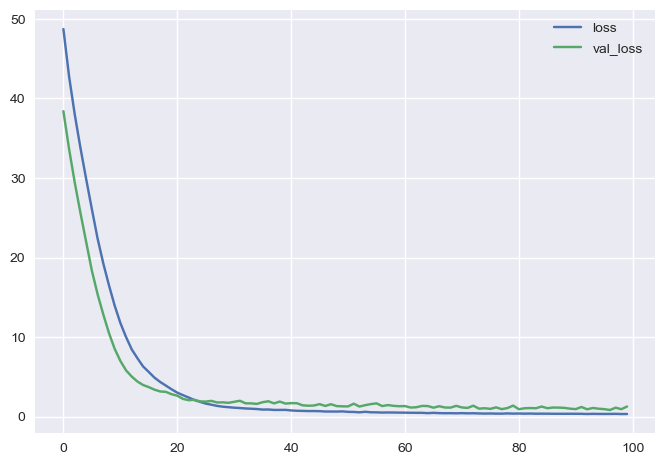

In [66]:
loss_df.plot()

# Model Evaluation

In [71]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 1.2857


1.2857125997543335

## model.predict() on X_train

In [75]:
train_pred = model.predict(X_train)
print(train_pred)

8/8 [==============================] - 0s 3ms/step
[[1.36675954e+00]
 [1.33080950e+01]
 [5.01458216e+00]
 [5.55932820e-01]
 [4.89830285e-01]
 [2.08708048e+00]
 [3.51386487e-01]
 [4.33620977e+00]
 [2.98190057e-01]
 [9.59336376e+00]
 [9.50163937e+00]
 [5.87844133e+00]
 [3.85287374e-01]
 [1.07286382e+00]
 [2.24616146e+00]
 [1.35887063e+00]
 [1.08142700e+01]
 [1.09851503e+01]
 [4.42465258e+00]
 [3.20096970e+00]
 [1.07992864e+00]
 [9.43750954e+00]
 [1.17459869e+01]
 [8.50152969e-01]
 [5.73622465e+00]
 [2.69750738e+00]
 [6.22223258e-01]
 [6.45420492e-01]
 [7.20358276e+00]
 [4.41589117e+00]
 [6.09258938e+00]
 [3.10529518e+00]
 [2.36028481e+00]
 [1.11861591e+01]
 [1.17201948e+01]
 [4.58105117e-01]
 [1.82821453e+00]
 [3.97093177e-01]
 [4.57521647e-01]
 [8.09020102e-01]
 [1.02984056e+01]
 [2.47060442e+00]
 [1.58019934e+01]
 [4.12243176e+00]
 [3.52711797e-01]
 [6.47909641e-01]
 [9.35532153e-01]
 [8.59987915e-01]
 [9.63813019e+00]
 [3.88055658e+00]
 [8.22991657e+00]
 [4.67577696e+00]
 [1.42707646e

## model.predict() on X_test

In [74]:
test_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [73]:
from sklearn.metrics import r2_score

In [76]:
r2_train = r2_score(y_train, train_pred)
print("R2 score for train data is: ", r2_train)

R2 score for train data is:  0.9857406548018268


In [77]:
r2_test = r2_score(y_test, test_pred)
print("R2 score for test data is: ", r2_test)

R2 score for test data is:  0.9407346830346709


In [80]:
print("Difference between train and test data is: ", (r2_train - r2_test).round(3))

Difference between train and test data is:  0.045
